In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('US_Corporates_data.csv')
print(data.shape)
print(list(data.columns))

(4000, 8)
['Firm ID', 'Year', 'Default', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TA', 'S/TA']


In [3]:
data.head(10)

,Firm ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TA,S/TA
0,1,1999,0,-1.781262,0.064049,2.294712,-1.472263,-0.773069
1,1,2000,0,-1.244437,1.183653,-0.595172,0.763392,-1.646494
2,1,2001,0,-1.134030,-0.976710,-0.016250,-0.724449,-0.623595
3,1,2002,0,-2.064973,1.117935,-0.627693,-0.070710,-1.906346
4,1,2003,0,-2.171751,-1.019897,-0.092342,-1.362903,-1.209339
5,1,2004,0,-0.624840,0.409344,1.613159,-0.724717,-0.142589
6,2,1999,0,-0.156292,-2.279849,-0.908938,-0.706711,0.288755
7,2,2000,0,-0.298583,0.110922,0.213547,1.734472,-1.352877
8,2,2001,0,-1.688872,0.433992,0.043044,0.350176,-1.811053
9,2,2002,0,-1.966991,-0.700142,0.011040,-0.110748,-1.789099


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
Firm ID    4000 non-null int64
Year       4000 non-null int64
Default    4000 non-null int64
WC/TA      4000 non-null float64
RE/TA      4000 non-null float64
EBIT/TA    4000 non-null float64
ME/TA      4000 non-null float64
S/TA       4000 non-null float64
dtypes: float64(5), int64(3)
memory usage: 250.1 KB


#### Input variables

### Data exploration

In [5]:
data['Default'].value_counts()

1    2000
0    2000
Name: Default, dtype: int64

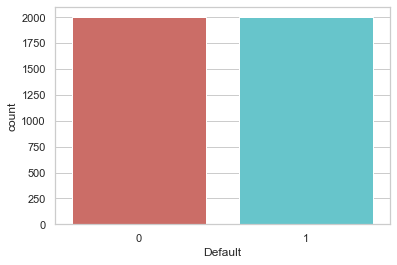

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='Default',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 296 no's and 1023 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [7]:
data.groupby('Default').mean()

,Firm ID,Year,WC/TA,RE/TA,EBIT/TA,ME/TA,S/TA
Default,,,,,,,
0,167.167,2001.498,-1.002510,0.026494,0.038728,-0.010614,-0.940141
1,500.500,2001.500,0.987538,-0.004162,-0.016554,0.015312,0.923102


In [8]:
data_final=data
data_final.columns.values

array(['Firm ID', 'Year', 'Default', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TA',
       'S/TA'], dtype=object)

In [9]:
data_final.drop(['Firm ID','Year'], axis=1, inplace=True)

In [10]:
X = data_final.loc[:, data_final.columns != 'Default']
y = data_final.loc[:, data_final.columns == 'Default']
y=y.astype('int')

### Recursive Feature Elimination

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


In [12]:
sf_X2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfe.ranking_},)
sf_X2.sort_values(by=['Importance'])

,Feature,Importance
0,WC/TA,1
1,RE/TA,1
2,EBIT/TA,1
3,ME/TA,1
4,S/TA,1


In [13]:
cols=[]
for i in range (0, len(sf_X2["Importance"])):
    if sf_X2["Importance"][i] == 1:
        cols.append(sf_X2["Feature"][i])
print(cols)
print(len(cols))

['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TA', 'S/TA']
5


The Recursive Feature Elimination (RFE) has helped us select the following features: 'DerogatoryReports', 'Age', 'Income', 'DebtToIncome', 'MonthlyDebt', 'DependentsNumber', 'MonthsAtCurrentAddress','NumberOfCreditCards', 'NumberOfActiveAccounts', 'HomeOwner_no', 'HomeOwner_yes', 'SelfEmployed_no', 'SelfEmployed_yes'.

In [14]:
X=X[cols]
y=y['Default']

### Implementing the model

In [15]:
import statsmodels.api as sm
# Add a constant to the independent value
X1 = sm.add_constant(X)
logit_model=sm.Logit(y,X1)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.302136
         Iterations: 35
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.564    
Dependent Variable:    Default             AIC:                 2429.0909
Date:                  2020-05-29 16:57    BIC:                 2466.8552
No. Observations:      4000                Log-Likelihood:      -1208.5  
Df Model:              5                   LL-Null:             -2772.6  
Df Residuals:          3994                LLR p-value:         0.0000   
Converged:             0.0000              Scale:               1.0000   
No. Iterations:        35.0000                                           
-------------------------------------------------------------------------
         Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
-------------------------------------------------------------------------
const    0.1185        0.0528  2.2455 0.0247         0.0151        0.2219
WC

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### GradientBoostingClassifier Model Fitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
gb = RandomForestClassifier()
gb.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and caculating the accuracy

In [17]:
y_pred = gb.predict(X_test)

In [18]:
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(gb.score(X_test, y_test)))

Accuracy of gradient boosting classifier on test set: 0.94


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       601
           1       0.95      0.93      0.94       599

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [20]:
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of gradient boosting classifier model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, we got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of gradient boosting classifier model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, we can\n say, when a model makes a prediction, how often it is correct. In our prediction case, when our\n gradient boosting classifier model predicted an applicant is going to accept a credit card, that\n applicant actually accepted", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")
#calculate Recall
print("\nRecall of gradient boosting classifier model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is an applicant who accepted a credit card present in the test set and our gradient\n boosting classifier model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of gradient boosting classifier model: 94.08%
Well, we got a classification rate of 94.08%

Precision of gradient boosting classifier model: 94.90%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, we can
 say, when a model makes a prediction, how often it is correct. In our prediction case, when our
 gradient boosting classifier model predicted an applicant is going to accept a credit card, that
 applicant actually accepted 94.90% of the time.

Recall of gradient boosting classifier model: 93.16%
Recall: If there is an applicant who accepted a credit card present in the test set and our gradient
 boosting classifier model can identify it 93.16% of the time.


### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[571  30]
 [ 41 558]]


In [22]:
print("The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix.sum()))

The result is telling us that we have:  1129 correct predictions.
The result is telling us that we have:  71 incorrect predictions.
We have a total predictions of:  1200


### ROC Curves

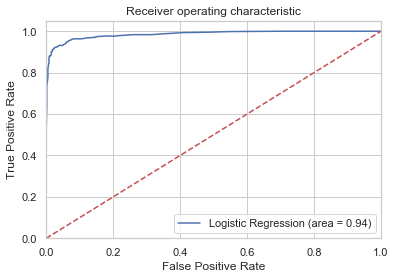

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [24]:
data['PD'] = gb.predict_proba(data[X_train.columns])[:,1]
data[['PD']].head(10)

,PD
0,0.00
1,0.03
2,0.03
3,0.01
4,0.01
5,0.03
6,0.16
7,0.01
8,0.00
9,0.00


In [25]:
data.to_csv('PD.csv', encoding='utf-8')